In [1]:
# Instalar Java y Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar -xvzf spark-3.2.1-bin-hadoop2.7.tgz
!pip install -q findspark

# Configurar entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

# Inicializar findspark y crear sesión
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ETL E-commerce").getOrCreate()

print("✅ Spark instalado y listo.")


spark-3.2.1-bin-hadoop2.7/
spark-3.2.1-bin-hadoop2.7/LICENSE
spark-3.2.1-bin-hadoop2.7/NOTICE
spark-3.2.1-bin-hadoop2.7/R/
spark-3.2.1-bin-hadoop2.7/R/lib/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/An

In [17]:
# =====================================
# ETL COMPLETO CON SPARK PARA E-COMMERCE
# =====================================

# CELDA 1: Instalación e importación de librerías
!pip install -q pyspark

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, lower, trim, expr, sum as spark_sum, date_format
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# =====================================
# 1. INGESTA DE DATOS
# =====================================

# Crear sesión Spark e ingresar datos desde CSV
spark = SparkSession.builder.appName("ETL E-commerce").getOrCreate()

# Ruta del archivo CSV (debe subirse en Colab)
ruta_csv = "/content/ventas-ecommerce.csv"
df = spark.read.option("header", True).option("inferSchema", True).csv(ruta_csv)
df.printSchema()
df.show(5)

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- TotalAmount: double (nullable = true)
 |-- Country: string (nullable = true)

+---------+---------+--------------------+--------+----------------+---------+----------+-----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|     InvoiceDate|UnitPrice|CustomerID|TotalAmount|       Country|
+---------+---------+--------------------+--------+----------------+---------+----------+-----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 08:26|     2.55|     17850|       15.3|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 08:26|     3.39|     17850|      20.34|United Kingdom|
|   536365|   84406B|CREAM CUPID H

In [20]:
# =====================================
# 2. PROCESAMIENTO Y TRANSFORMACIÓN (ETL)
# =====================================

# CELDA 3: Limpieza, transformación y columna calculada
df_clean = df.dropna() \
    .filter((col("Quantity") > 0) & (col("UnitPrice") > 0)) \
    .withColumn("InvoiceDate", to_timestamp("InvoiceDate")) \
    .withColumn("Description", trim(lower(col("Description")))) \
    .withColumn("CalculatedTotal", col("Quantity") * col("UnitPrice"))

df_clean.show(5)

+---------+---------+--------------------+--------+-----------+---------+----------+-----------+--------------+------------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|TotalAmount|       Country|   CalculatedTotal|
+---------+---------+--------------------+--------+-----------+---------+----------+-----------+--------------+------------------+
|   536365|   85123A|white hanging hea...|       6|       null|     2.55|     17850|       15.3|United Kingdom|15.299999999999999|
|   536365|    71053| white metal lantern|       6|       null|     3.39|     17850|      20.34|United Kingdom|             20.34|
|   536365|   84406B|cream cupid heart...|       8|       null|     2.75|     17850|       22.0|United Kingdom|              22.0|
|   536365|   84029G|knitted union fla...|       6|       null|     3.39|     17850|      20.34|United Kingdom|             20.34|
|   536365|   84029E|red woolly hottie...|       6|       null|     3.39|     17850

In [21]:
# =====================================
# 3. ALMACENAMIENTO
# =====================================

#: Exportar CSV limpio
df_clean.coalesce(1).write.option("header", True).mode("overwrite").csv("/content/ventas_ecommerce_limpio")


In [22]:
# =====================================
# 4. ORQUESTACIÓN Y AUTOMATIZACIÓN
# =====================================

# Simulación básica de pipeline automático
def run_pipeline():
    df = spark.read.option("header", True).option("inferSchema", True).csv(ruta_csv)
    df_clean = df.dropna() \
        .filter((col("Quantity") > 0) & (col("UnitPrice") > 0)) \
        .withColumn("InvoiceDate", to_timestamp("InvoiceDate")) \
        .withColumn("Description", trim(lower(col("Description")))) \
        .withColumn("CalculatedTotal", col("Quantity") * col("UnitPrice"))
    df_clean.coalesce(1).write.option("header", True).mode("overwrite").csv("/content/ventas_etl_autom.csv")

run_pipeline()

In [24]:
# mostrar estructura DAG para Airflow
print("""
# DAG de Airflow (referencia, no ejecutable en Colab)
from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime

def run_etl():
    # código del pipeline aquí
    pass

with DAG('etl_ecommerce', start_date=datetime(2024,1,1), schedule_interval='@daily', catchup=False) as dag:
    etl_task = PythonOperator(task_id='run_etl', python_callable=run_etl)
""")


# DAG de Airflow (referencia, no ejecutable en Colab)
from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime

def run_etl():
    # código del pipeline aquí
    pass

with DAG('etl_ecommerce', start_date=datetime(2024,1,1), schedule_interval='@daily', catchup=False) as dag:
    etl_task = PythonOperator(task_id='run_etl', python_callable=run_etl)



In [25]:
# =====================================
# 5. ESCALABILIDAD Y EFICIENCIA
# =====================================

#Simulación de carga masiva (repartition y cache)
df_parallel = df_clean.repartition(8).cache()

# Exportar a formato eficiente (Parquet)
df_parallel.write.mode("overwrite").parquet("/content/ventas_ecommerce_parquet")

In [37]:
# =====================================
# 6. VISUALIZACIÓN Y EXPOSICIÓN DE DATOS
# =====================================

# Ventas por mes
# Asegurarse de que el DataFrame de Spark tiene datos válidos
from pyspark.sql.functions import to_timestamp, col, trim, lower

df_clean = df.dropna(subset=["InvoiceDate", "Quantity", "UnitPrice"]) \
    .filter((col("Quantity") > 0) & (col("UnitPrice") > 0)) \
    .withColumn("InvoiceDate", to_timestamp(col("InvoiceDate"), "dd/MM/yyyy HH:mm")) \
    .withColumn("Description", trim(lower(col("Description")))) \
    .withColumn("CalculatedTotal", col("Quantity") * col("UnitPrice"))

df_clean.select("InvoiceDate", "CalculatedTotal").show(5, truncate=False)

+-------------------+------------------+
|InvoiceDate        |CalculatedTotal   |
+-------------------+------------------+
|2010-12-01 08:26:00|15.299999999999999|
|2010-12-01 08:26:00|20.34             |
|2010-12-01 08:26:00|22.0              |
|2010-12-01 08:26:00|20.34             |
|2010-12-01 08:26:00|20.34             |
+-------------------+------------------+
only showing top 5 rows



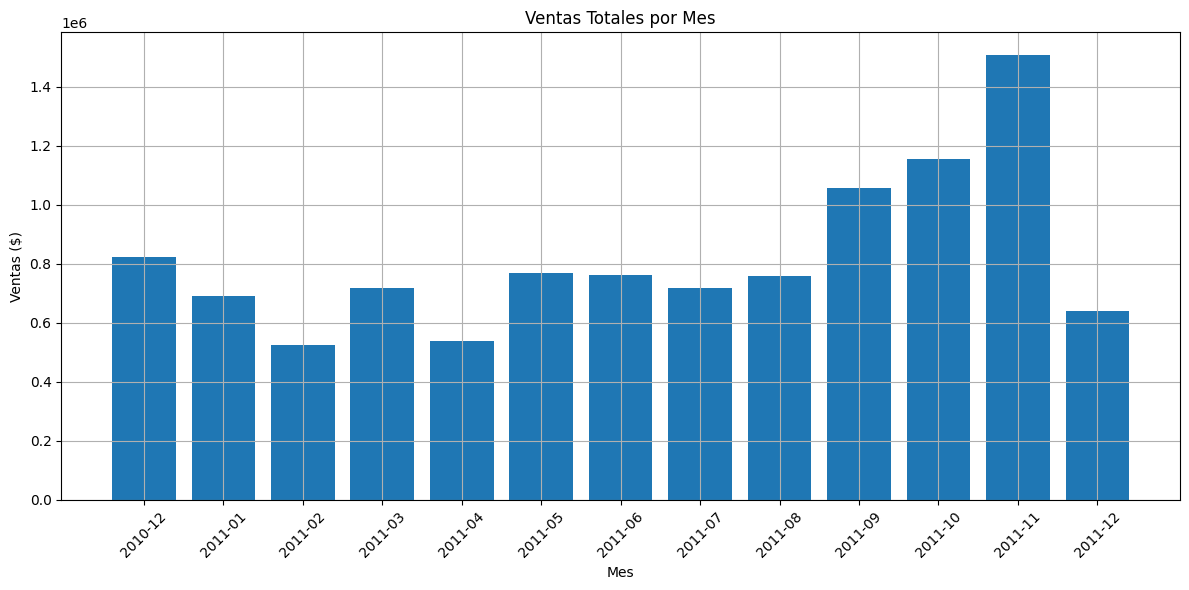

In [38]:
from pyspark.sql.functions import date_format, sum as spark_sum

df_mes = df_clean.withColumn("Mes", date_format("InvoiceDate", "yyyy-MM")) \
    .groupBy("Mes") \
    .agg(spark_sum("CalculatedTotal").alias("VentasTotales")) \
    .orderBy("Mes")

ventas_mes_pd = df_mes.toPandas().dropna()

if ventas_mes_pd.empty:
    print("⚠️ Aún no hay datos válidos.")
else:
    plt.figure(figsize=(12,6))
    plt.bar(ventas_mes_pd["Mes"], ventas_mes_pd["VentasTotales"])
    plt.xticks(rotation=45)
    plt.title("Ventas Totales por Mes")
    plt.xlabel("Mes")
    plt.ylabel("Ventas ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

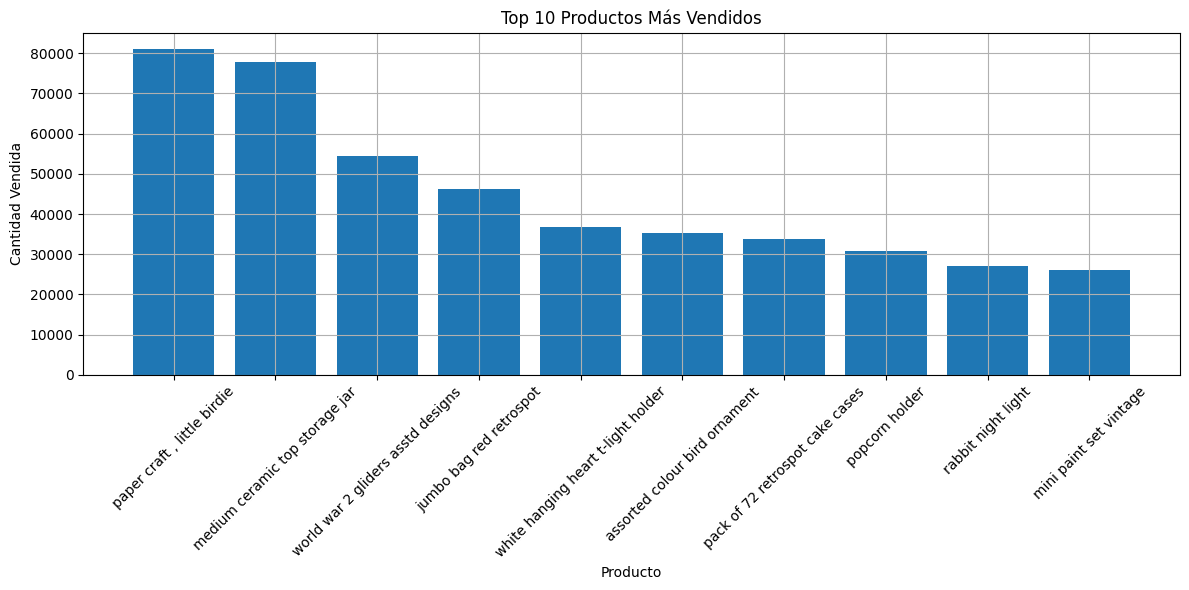

In [28]:
#Top 10 productos
productos_top = df_clean.groupBy("Description") \
    .agg(spark_sum("Quantity").alias("TotalVendido")) \
    .orderBy(col("TotalVendido").desc()) \
    .limit(10)

productos_top_pd = productos_top.toPandas()

plt.figure(figsize=(12,6))
plt.bar(productos_top_pd["Description"], productos_top_pd["TotalVendido"])
plt.title("Top 10 Productos Más Vendidos")
plt.xticks(rotation=45)
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.grid(True)
plt.tight_layout()
plt.show()
